<a href="https://colab.research.google.com/github/Samskriti-0605/CODSOFT-Task2/blob/main/IRIS%20FLOWER%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as num_lib
import pandas as pd_lib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sea_lib

In [2]:
import seaborn as sea_lib
flower=sea_lib.load_dataset('iris')
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import pandas as pd_lib
flower['species'],categories=pd_lib.factorize(flower['species'])
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
flower.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [6]:
flower.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


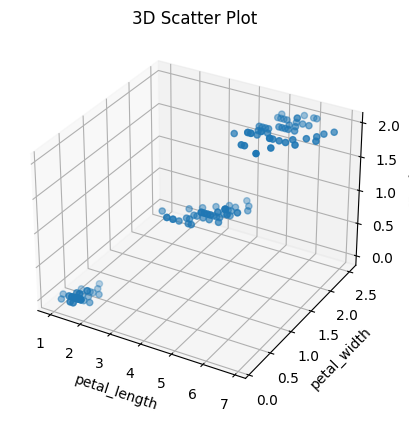

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(flower.petal_length, flower.petal_width, flower.species)
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot')
plt.show()

Text(0.5, 0.5, 'Sepal_Width')

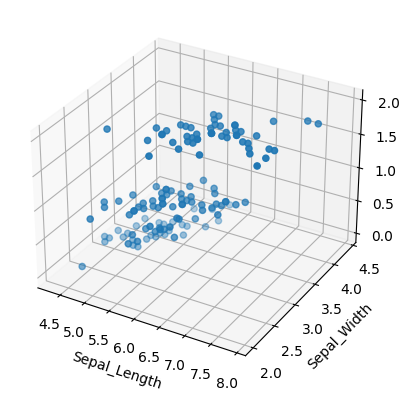

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')
ax.scatter(flower.sepal_length, flower.sepal_width, flower.species)
ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

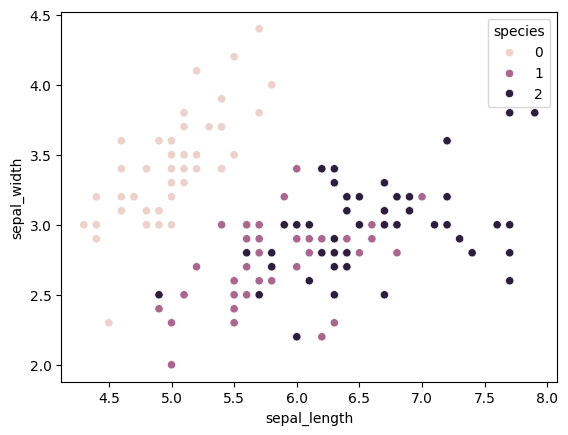

In [ ]:
sea_lib.scatterplot(x='sepal_length',y='sepal_width',data=flower,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

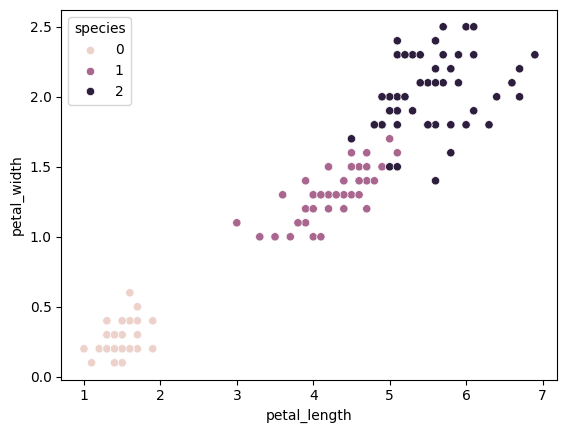

In [ ]:
sea_lib.scatterplot(x='petal_length',y='petal_width',data=flower,hue='species')

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(flower[['petal_length','petal_width']])
    sse.append(km.inertia_)

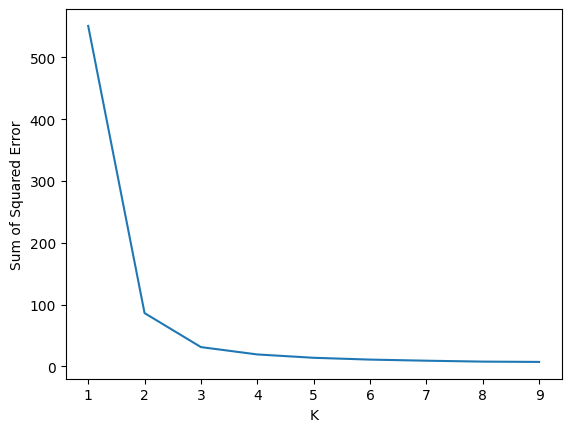

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

In [ ]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 14.077321759259267,
 11.148929548747395,
 9.363782369804111,
 7.884770562770562,
 7.388853174603177]

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(flower[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
flower['cluster']=y_predicted
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix=confusion_matrix(flower.species,flower.cluster)
 confusion_matrix

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [46,  0,  4]])

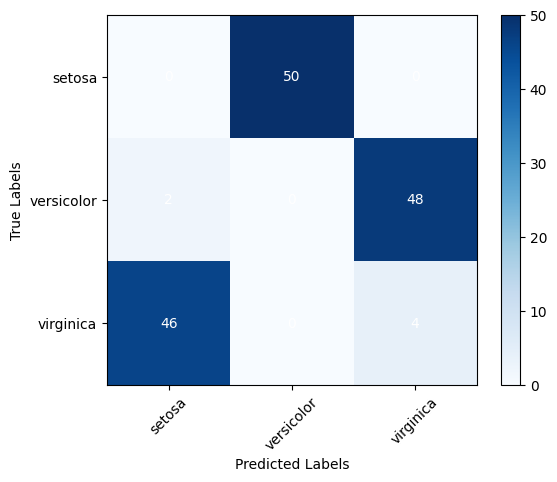

In [ ]:


true_labels = flower.species
predicted_labels = flower.cluster

cm = confusion_matrix(true_labels, predicted_labels)

class_labels = num_lib.array(['setosa', 'versicolor', 'virginica'])

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = num_lib.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), horizontalalignment='center', verticalalignment='center', color='white')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()